In [21]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import time
# see also the "datetime" package
import solutions

# Part 2: Speed Racer!
Let's figure out which of the solutions from last week is the fastest. 

To do this, we want to evaluate the runtime for a varying number of coordinates.

In [7]:
# This tells you the system time in seconds (from some system-dependent zero point)
time.time()

1461712130.092395

**NOTE:** this is *not* the best way to measure time, but it illustrates how the process works. 

Read about the [timeit](https://docs.python.org/2/library/timeit.html) module, and definitely the doccumentation of the [time](https://docs.python.org/3.5/library/time.html) module we're using.

In [8]:
# here's a simple way to determine how long something takes to evaluate:
t0 = time.time()

# do some random task
x = -1
for k in range(0,100000):
    x = k*x

t1 = time.time()

duration = t1 - t0
print('This task took: ' + str(duration) + ' seconds')

This task took: 0.014384031295776367 seconds


In [9]:
# here's how you might return two numbers or arrays from a function

def myfunc(a):
    out1 = a+2
    out2 = a-2
    return out1, out2


In [10]:
x, y = myfunc(7)
print(x,y)

9 5


In [11]:
# an example of random numbers uniformly chosen in the range -5 to 5

# note, other random number distributions exist, and are very useful (e.g. Gaussian!)

N = 20

rmax = 5
rmin = -5

rando_calrissian = np.random.random(N) * (rmax - rmin) + rmin

rando_calrissian

array([-4.6717978 ,  0.85765872, -0.41153541,  1.97009536, -0.63540008,
        1.89880121,  2.78257972,  1.09874222,  1.84474102, -3.70300295,
       -4.64436713,  0.0343075 , -1.53396123,  4.68325373,  1.38040073,
       -3.36449135,  2.16266829, -1.48924603, -4.8908767 , -1.14418342])

In [89]:
def timefunc(N):
    '''
    This is a function to determine the time it takes the two constellation functions to run by testing N coordinates
    
    Parameters
    -------
    N: int
        Tthe number of coordinates to be tested
        
    Returns
    -------
    time1: float
        Time it takes the Davenport algorithm to run
    time2: float
        Time it takes the Christenson algorithm to run
    '''
    ra_min = 0
    ra_max = 24
    dec_min = -90
    dec_max = 90
    
    ra = np.random.random(N)*(ra_max-ra_min) + ra_min
    dec = np.random.random(N)*(dec_max-dec_min) - dec_min
    
    #print(ra)
    #print(dec)
    
    t_0a = time.time()
        
    for i in range(0,N):
        solutions.constell_christenson(ra[i],dec[i])
        
    time1 = time.time() - t_0a
    
    t_0b=time.time()
    
    solutions.constell_davenport(ra,dec)
    
    time2 = time.time() - t_0b
    
    return time1,time2

In [90]:
timefunc(1)

(0.007400989532470703, 0.0072209835052490234)

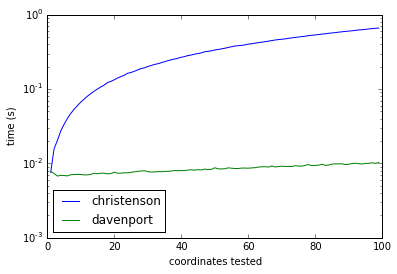

In [99]:
n = np.arange(1,100,1)
christenson_time = np.zeros([np.size(n)])
davenport_time = np.zeros([np.size(n)])


for i in range(0,np.size(n)):
    christenson_time[i],davenport_time[i] = timefunc(n[i])
    
plt.figure()
plt.plot(n,christenson_time,c='g',label='christenson')
plt.plot(n,davenport_time,c='b',label='davenport')
plt.xlabel("coordinates tested")
plt.ylabel('time (s)')
plt.yscale('log')
plt.legend(loc='best')
plt.show()


# Part 3: Write some unit tests

**unittest**: There *is* a [built-in framework](https://docs.python.org/2.7/library/unittest.html) for formally handling unit tests. It is a little difficult to start using, and we won't use it today. There are some nicer testing suites available (e.g. [nose](https://nose.readthedocs.org/en/latest/))

**Exceptions**: Python defines a bunch of [built-in exceptions](https://docs.python.org/2/library/exceptions.html) that can come up when code crashes. In general you'll try to [catch these](https://wiki.python.org/moin/HandlingExceptions) and handle them gracefully. Usually I write Try/Except statements as I find these errors


In [133]:
def testfunc(N):
    '''
    This is a function to check  if the outputs for each algorithm match.
    
    Parameters
    -------
    N: int
        Tthe number of coordinates to be tested
        
    Returns
    -------
    frac: float
        Fraction of values that agree between the two algorithms
    
    '''
    ra_min = 0
    ra_max = 24
    dec_min = -90
    dec_max = 90
    
    ra = np.random.random(N)*(ra_max-ra_min) + ra_min
    dec = np.random.random(N)*(dec_max-dec_min) - dec_min
    
    d_soln=solutions.constell_davenport(ra,dec)
    
    count=0
    bad = 0
    
    for i in range(0,N):
        if d_soln[i] == solutions.constell_christenson(ra[i],dec[i]):
            count = count+1
        if d_soln[i] != solutions.constell_christenson(ra[i],dec[i]):
            bad=bad+1
        
    print(count)
    print(bad)
    
    frac = count/(count+bad)
    
    return frac
        
    

In [137]:
testfunc(100)

100
0


1.0

# Modifications to code- error traps

My code fails vocally for strings

In [166]:
def constell_christenson(ra,dec):
    '''
    This is a function to determine the constellation in which an object is located from its ra and dec
    Written by @hmchristenson 
    
    Parameters
    -------
    ra: float
        Right ascension
    dec: float
        Declination
        
    Returns
    -------
    output: string
        Name of the constellation in which the object is located
    '''
    
    try:
        dec = float(dec)
    except ValueError:
        print("Declination is not a float!")
        return
    
    try:
        ra = float(ra)
    except ValueError:
        print("Right ascension is not a float!")
        return
        
     
    if ra < 0:
        print("Right ascension must be greater than zero!")
        return
    
    RAl, RAu, Decl, = np.loadtxt('data/data.txt', delimiter=',', usecols=(0,1,2), unpack=True)
    names = np.loadtxt('data/data.txt', delimiter=',', usecols=(3,), unpack=True, dtype='str')
    
    count = 0

    while(Decl[count] > dec):
        count = count + 1
    dec_low = Decl[count]
    
    while(RAu[count] <= ra):
        count = count + 1
    ra_up = RAu[count]

    while(RAl[count] > ra or RAu[count] < ra):
        count = count + 1 
    ra_low = RAl[count]
       
    output = names[count]
    
    return output

In [168]:
constell_christenson(-10,'d')

Declination is not a float!
